#Trabajo Práctico final - Programación II

- Grupo 5
- Comisión 1
- Mateo Gravi Fiorino
- Tomás Navarro Miñon
- Alejo Lo Menzo

- url : https://www.kaggle.com/datasets/thedevastator/fifa-world-cup-anomaly-detection-in-player-ratin

- nombre_dataset : FIFA World Cup Player Ratings

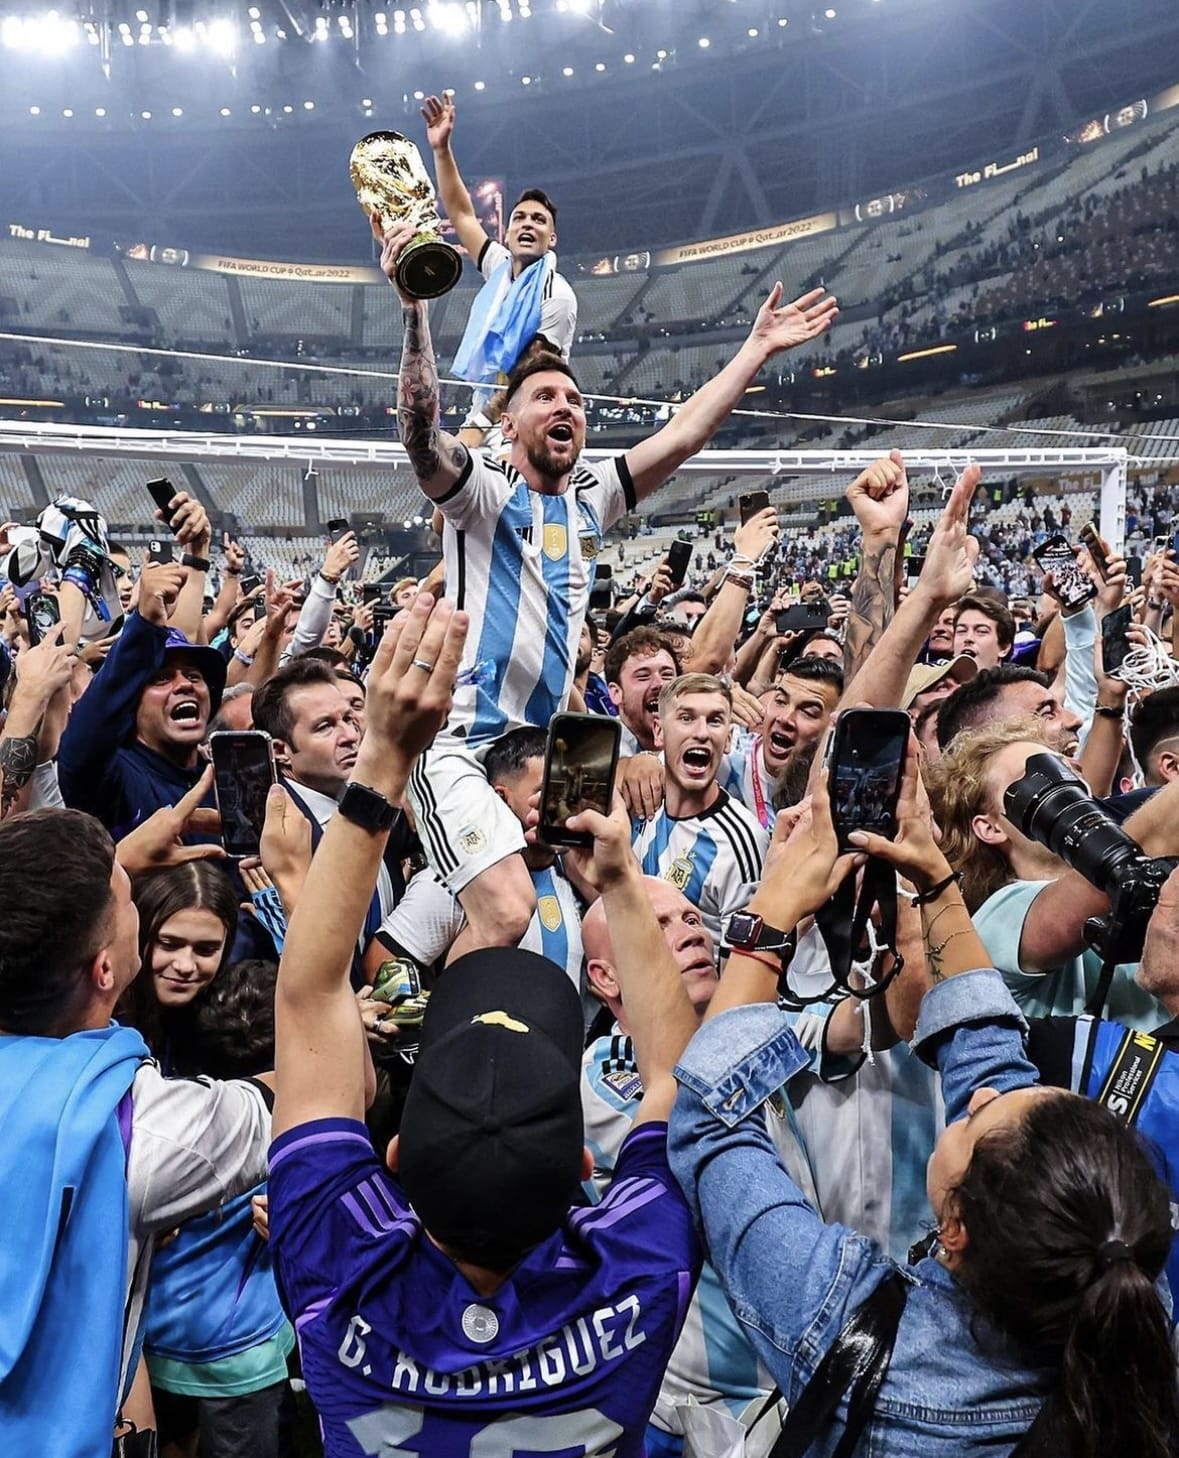

#Explicacion DATA SET


El data set es de la pagina Kaggle, incluye todos los jugadores afiliados a la FIFA con sus puntajes del videojuego FIFA 22. 

La idea del Trabajo es mediante estos datos, intentar predecir qué Selecciones Nacionales son las que más lejos llegaran en el Mundial.




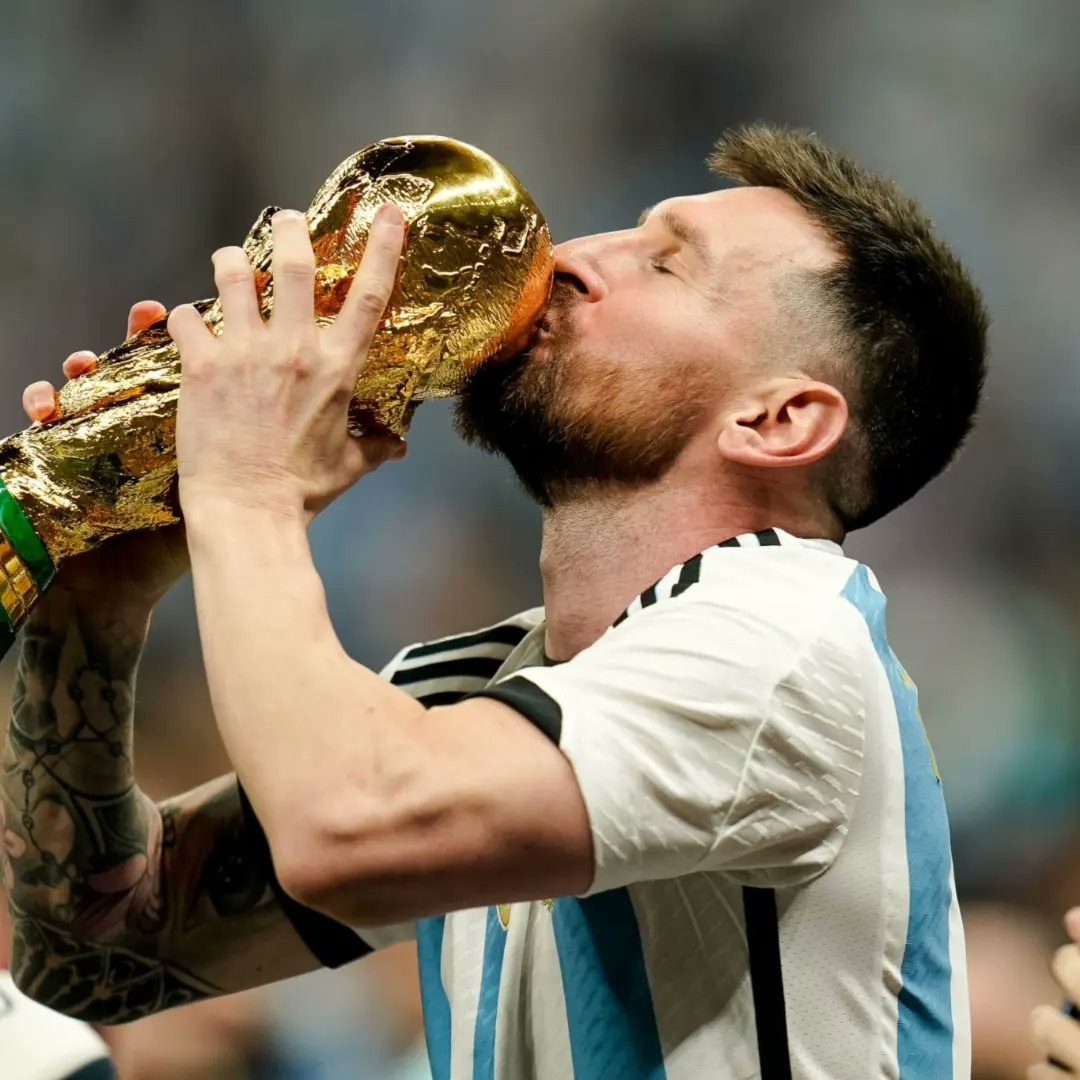






## LECTURA DE LOS DATOS


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("/content/players_20.csv")
pd.set_option("display.max_columns",104)
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

# FILTRADO DE LOS PAISES QUE JUEGAN EL MUNDIAL

Como no todos los países juegan el Mundial, tuvimos que filtrar solo aquellos que habían clasificado, para así solo tener los jugadores que juegan en el mundial. Una vez filtrados los países, tomamos solo los mejores 26 jugadores por cada país para nuestro dataframe.

In [ ]:
#Momento data frame

df = data[['nationality', 'age','overall','defending', 'passing','shooting']].copy()

lista_participantes=["Qatar", "Ecuador", "Senegal", "Netherlands", "England", "Iran",
        "United States", "Wales", "Argentina", "Saudi Arabia", "Mexico",
        "Poland", "France", "Australia", "Denmark", "Tunisia", "Spain",
        "Costa Rica", "Germany", "Japan", "Belgium", "Canada",
        "Morocco", "Croatia", "Brazil", "Serbia", "Switzerland", "Cameroon",
        "Portugal", "Ghana", "Uruguay", "Korea Republic"
]


#Asumimos que los mejores 26 son los que van al mundial
df = df[df['nationality'].isin(lista_participantes)]


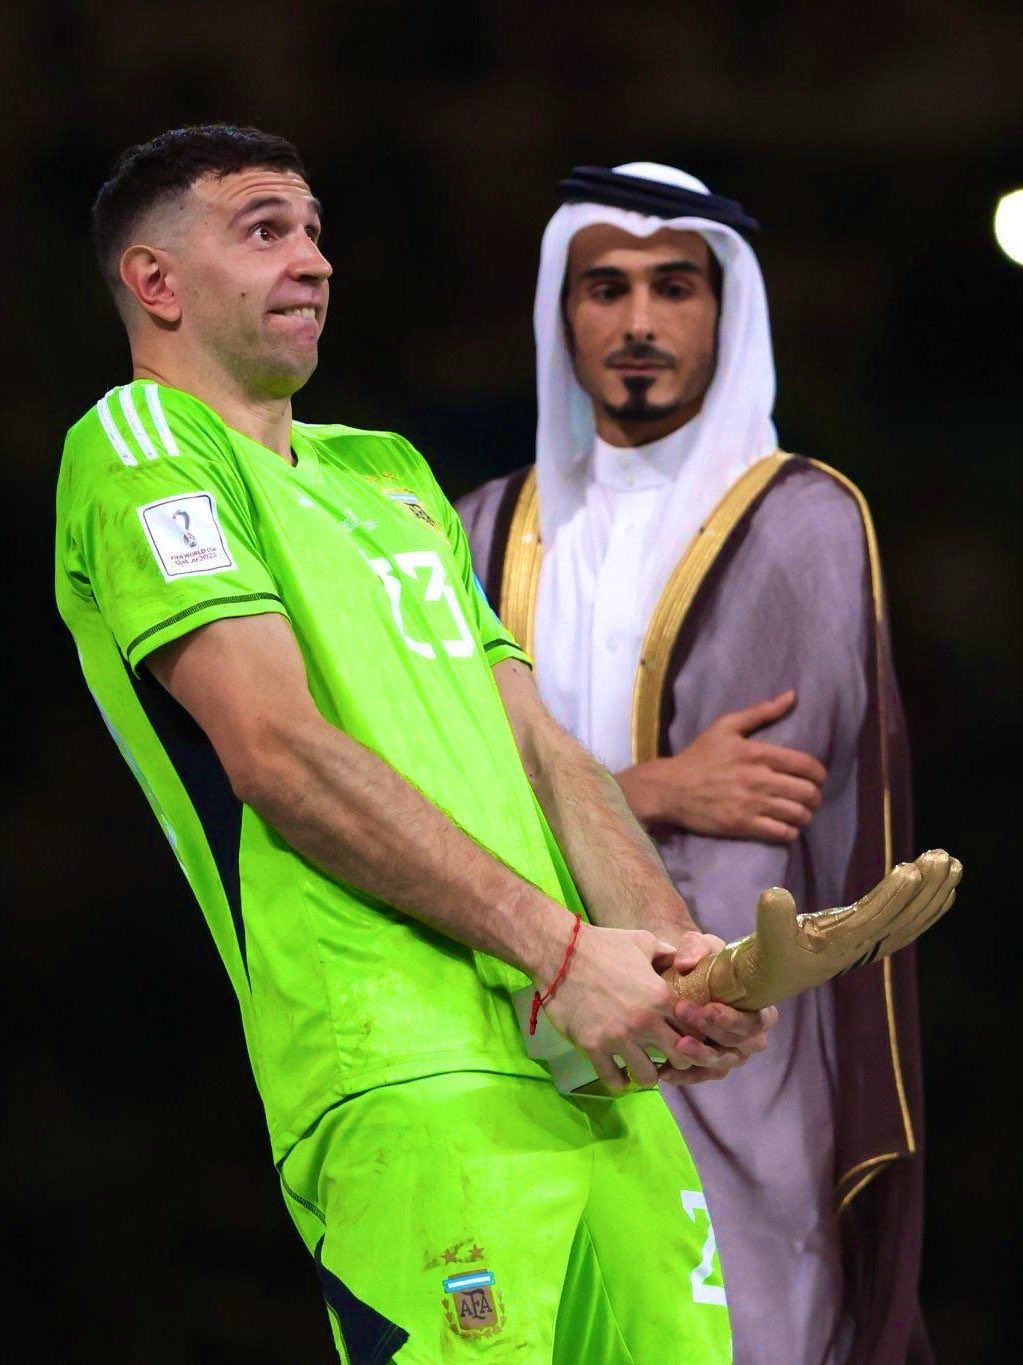

#¿Cuantos cracks hay por selección Nacional?


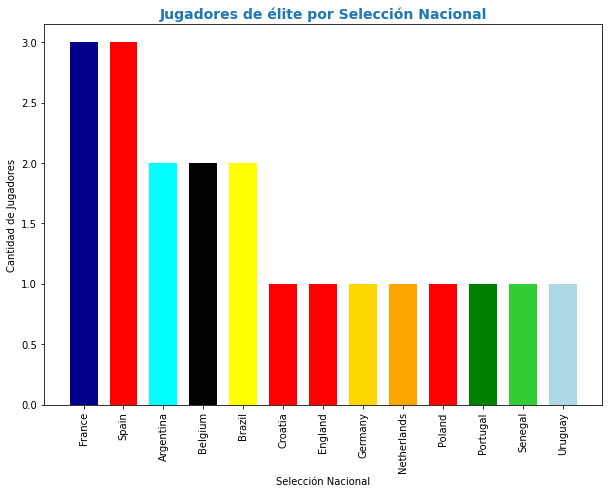

In [ ]:

dato_sumar = df.groupby(['nationality'])['overall'].apply(lambda x: (x >= 89).sum()) # Agrupamos por 'overall' que es la media
dato_Adict = dato_sumar.to_dict() 
dato_Adict = sorted(list(dato_Adict.items()), key = lambda x: x[1], reverse = True) # Hace una lista con los items del dic anterior, las ordena.
names = []
valores = []


for key, value in dato_Adict:
  if value != 0:
    names.append(key)
    valores.append(value)


# Colores y alineacion
colores = ['darkblue','red','cyan','black','yellow','red','red','gold','orange','red','green','limegreen','lightblue']
alignment = ["right", "left", "center"]

# Gráfico
fig, ax = plt.subplots()
ax.bar(names, valores,width = 0.7, color= colores) 
ax.set_xticklabels(names, rotation=90)
fig.set_size_inches(10, 7)
ax.set_title('Jugadores de élite por Selección Nacional', loc='center', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'} )
ax.set_xlabel('Selección Nacional')
ax.set_ylabel('Cantidad de Jugadores')

plt.show()


##La relación la vemos claramente, aquellas que llegan a instancias finales son las que tienen crakcs, podemos ver que la mayoría de las selecciones que vemos en el gráfico, pudieron pasar fase de grupos. 

# ¿Qué tan importante es la defensa para llegar lejos?

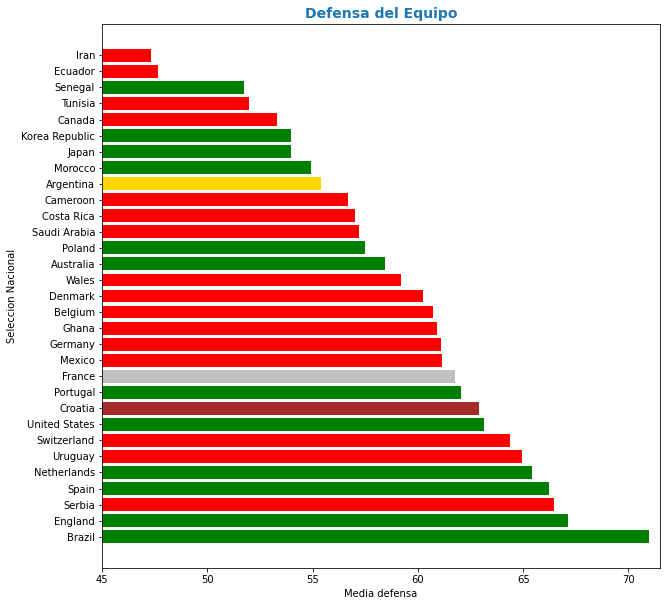

In [ ]:

# Datos
estrellas_pais = df.groupby(['nationality'])['defending'].apply(lambda x: x.head(26).mean())
estrellas = estrellas_pais.to_dict()
estrellas = sorted(list(estrellas.items()), key = lambda x: x[1], reverse = True)
names = []
valores = []


for key, value in estrellas:
  if value != 0:
    names.append(key)
    valores.append(value)
    
# Grafico
colores = ['green','green','red','green','green','red','red','green','brown','green','silver','red','red','red','red','red','red','green','green','red','red','red','gold','green','green','green','red','red','green','red','red']
alignment = ["right", "left", "center"]


fig, ax = plt.subplots()
ax.barh(names,valores,color=colores)


fig.set_size_inches(10, 10)
ax.set_title('Defensa del Equipo', loc='center', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'} )
ax.set_ylabel('Seleccion Nacional')
ax.set_xlabel('Media defensa')
ax.set_xlim([45,71.5])
plt.show()


#¿Y el ataque?


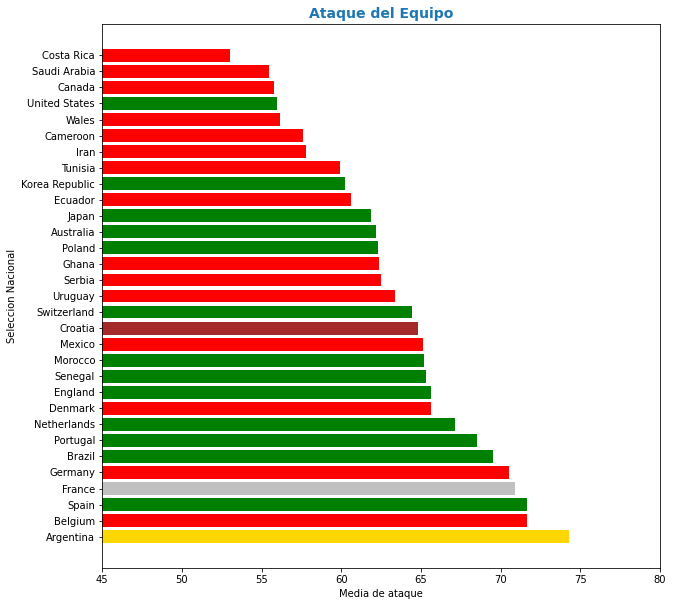

In [ ]:
# Datos
estrellas_pais = df.groupby(['nationality'])['shooting'].apply(lambda x: x.head(26).mean())
estrellas = estrellas_pais.to_dict()
estrellas = sorted(list(estrellas.items()), key = lambda x: x[1], reverse = True)
names = []
valores = []


for key, value in estrellas:
  if value != 0:
    names.append(key)
    valores.append(value)
    
# Grafico
colores = ['gold','red','green','silver','red','green','green','green','red','green','green','green','red','brown','green','red','red','red','green','green','green','red','green','red','red','red','red','green','red','red','red']
alignment = ["right", "left", "center"]


fig, ax = plt.subplots()
ax.barh(names,valores,color=colores)


fig.set_size_inches(10, 10)
ax.set_title('Ataque del Equipo', loc='center', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'} )
ax.set_ylabel('Seleccion Nacional')
ax.set_xlabel('Media de ataque')
ax.set_xlim([45,80])
plt.show()

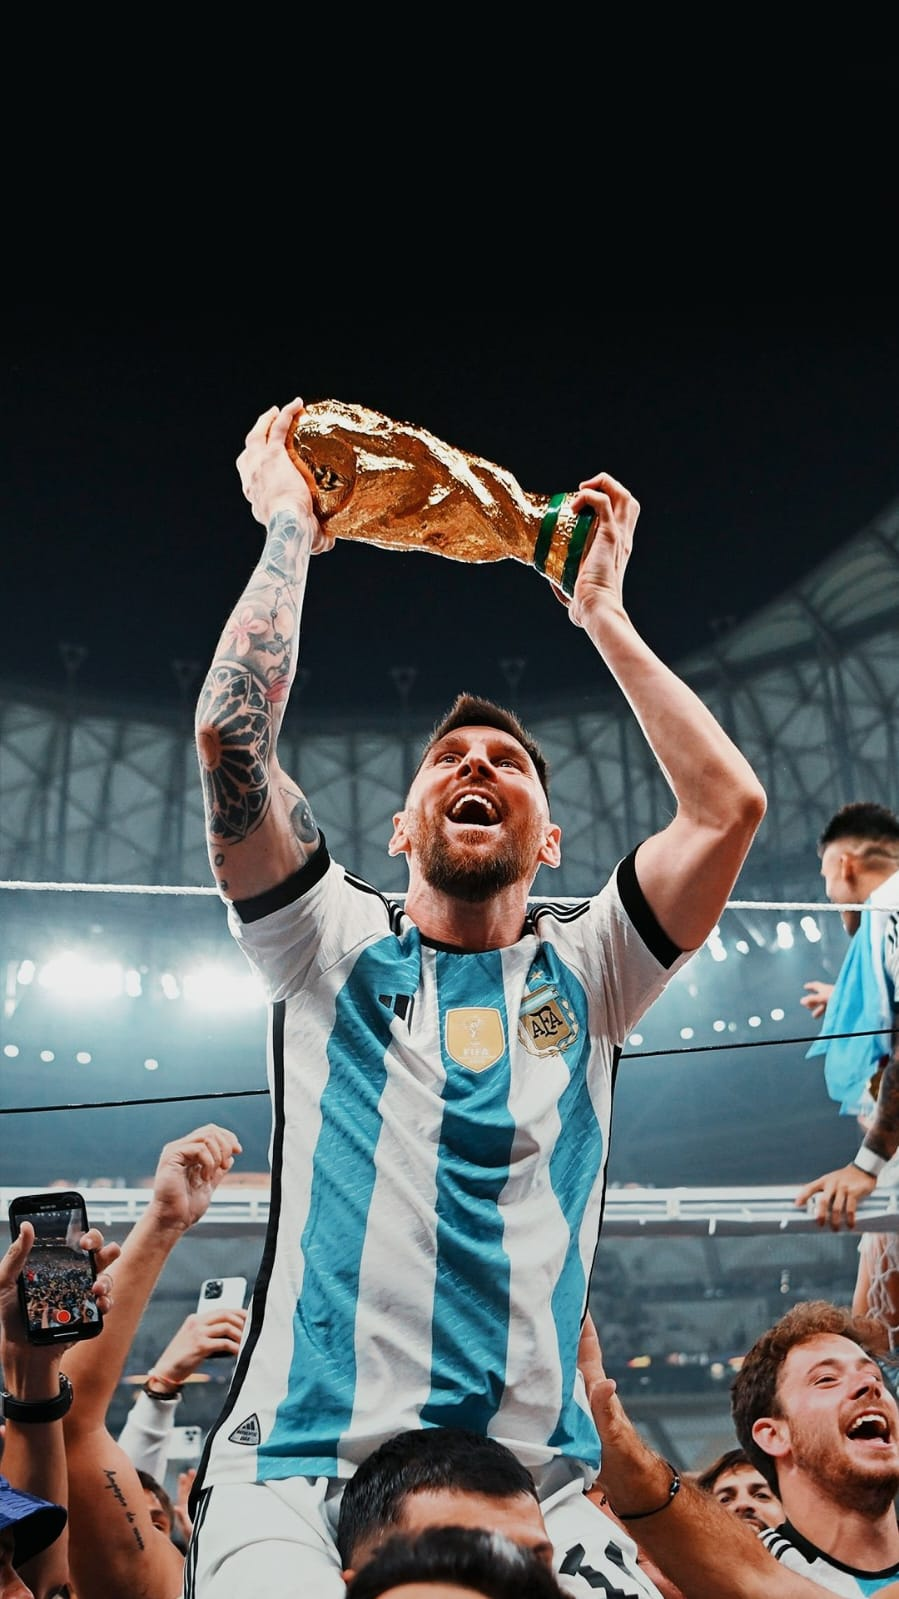

# Es común pensar en el ambiente del fútbol, que los equipos más 'viejos', se quedan rezagados ante aquellos mas jóvenes. Como dijo la selección de Bélgica en el medio del mundial


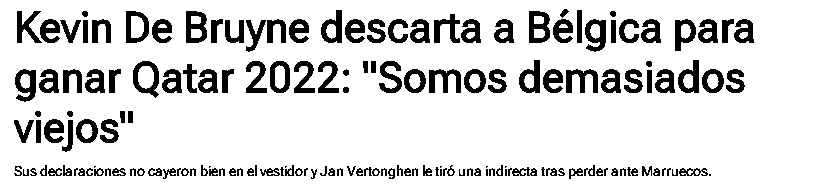!

<ipython-input-37-53d795edf5ba>:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(names,valores)


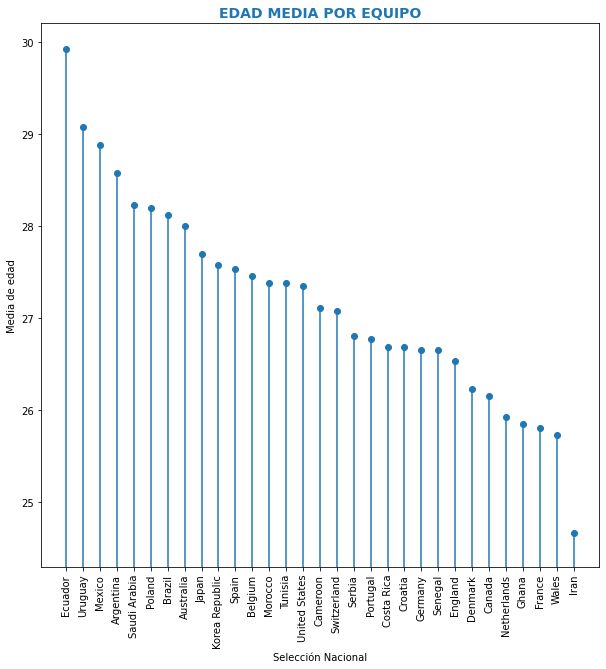

In [ ]:
# Datos
estrellas_pais = df.groupby(['nationality'])['age'].apply(lambda x: x.head(26).mean())
estrellas = estrellas_pais.to_dict()
estrellas = sorted(list(estrellas.items()), key = lambda x: x[1], reverse = True)
names = []
valores = []


for key, value in estrellas:
  if value != 0:
    names.append(key)
    valores.append(value)
    
#Grafico
alignment = ["right", "left", "center"]

fig, ax = plt.subplots()
ax.stem(names,valores)

ax.set_xticklabels(names, rotation=90)
fig.set_size_inches(10, 10)
ax.set_title('EDAD MEDIA POR EQUIPO', loc='center', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'} )
ax.set_xlabel('Selección Nacional')
ax.set_ylabel('Media de edad')
ax.set_ylim([24.3,30.2])

plt.show()




1. Ecuador / Fase de grupos
2. Uruguay / Fase de grupos
3. Mexico  / Fase de grupos
4. Argentina / Campeon
5. Arabia Saudita / Fase de grupos
6. Polonia / Octavos
7. Brasil / Cuartos
8. Australia / Octavos
9. Japon / Octavos
10. Corea del Sur / Octavos
11. España / Octavos
12. Belgica / Fase de grupos
13. Marruecos / Semis
14. Tunez / Fase de grupos
15. USA / Octavos
16. Camerun / Fase de grupos
17. Suiza / Octavos
18. Serbia / Fase de grupos
19. Portugal / Cuartos
20. Costa Rica / Fase de grupos
21. Croacia / Semis
22. Alemania / Fase de grupos
23. Senegal / Octavos
24. Inglaterra / Cuartos
25. Dinamarca / Fase de grupos
26. Canada / Fase de grupos
27. Holanda / Cuartos
28. Ghana / Fase de grupos 
29. Francia / Final
30. Gales / Fase de grupos
31. Iran / Fase de grupos

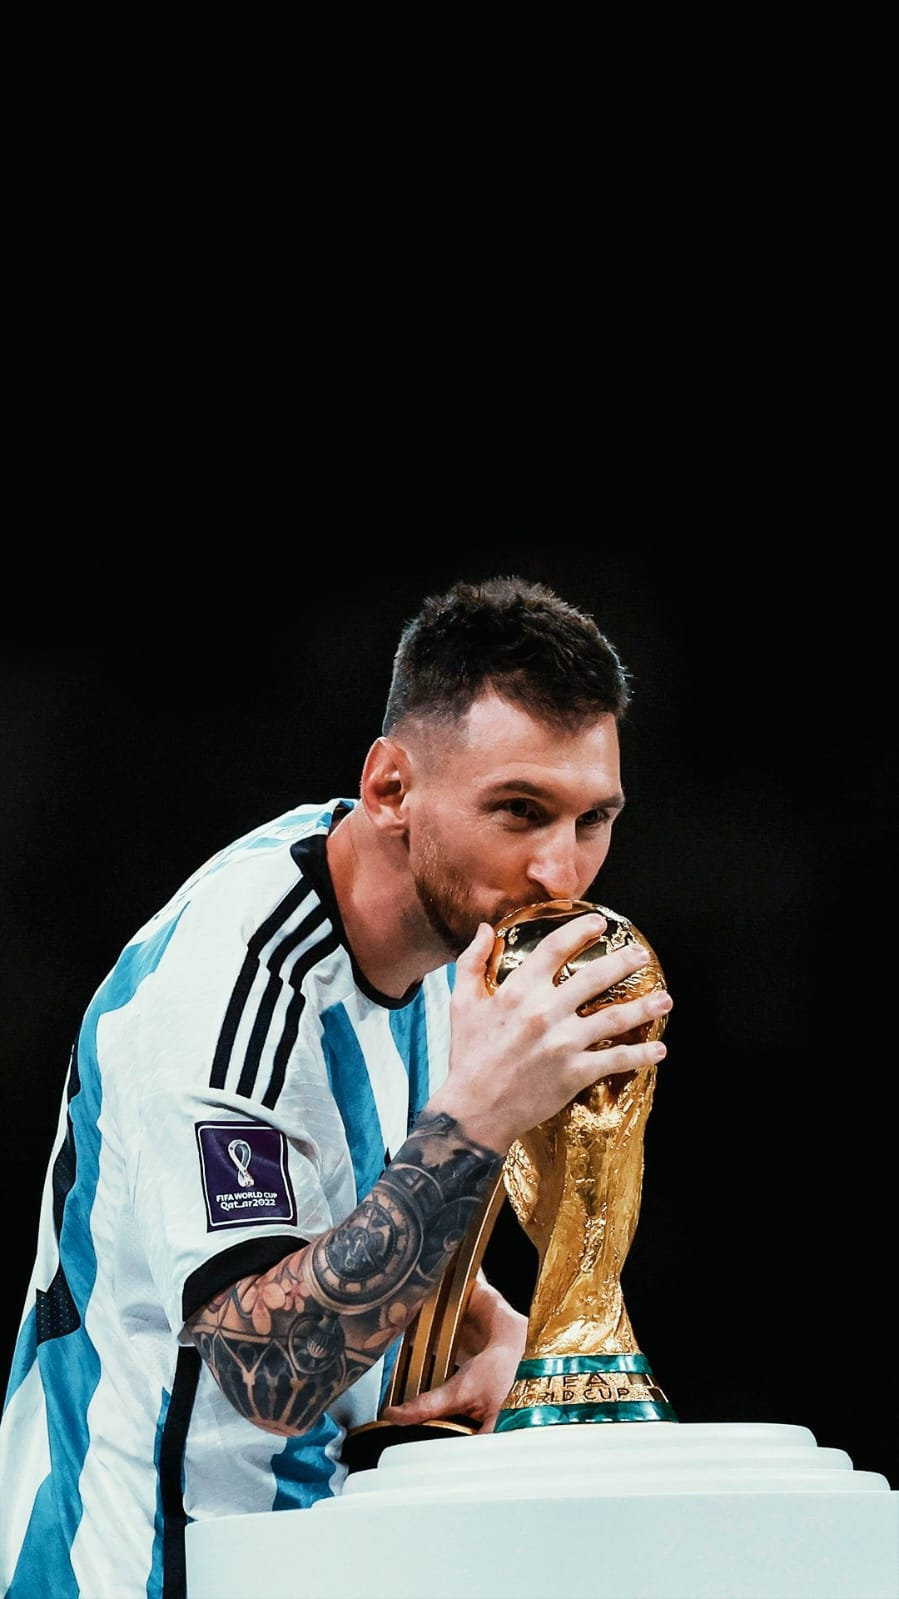